In [1]:
from text_analytics_fns import *
%matplotlib inline

load params
loading model
creating tensorflow session
create model
embd function
loading Parameters
create mlstm
loading Parameters
loading Parameters
loading Parameters
loading Parameters
loading Parameters
loading Parameters
loading Parameters
loading Parameters
loading Parameters
fully connected layer creation
loading Parameters
loading Parameters


## Blog/news analytics
### getting webhose(blog/news data)  
### preprocessing them

In [ ]:
keywords=["mumbai"]
op_all=get_data_webhose(keyword=" ".join(keywords),realtime_flag=False,timeduration=10)

op_all_1=get_sentiment_on_webhose(op_all,keywords)

In [3]:
op_all_1.head()

,site_categories,title,site,site_section,published,url,performance_score,site_full,social,domain_rank,...,rating,crawled,highlightText,highlightTitle,language,text,status,stats,median_sentiment_level,date
0,[media],India ODI squad for South Africa series: No pl...,indiatribune.com,http://indiatribune.com/feed,2017-12-23 22:58:00,http://omgili.com/ri/m1nCBNv_pozPVAIopamJDcjk9...,0,indiatribune.com,"{'gplus': {'shares': 0}, 'pinterest': {'shares...",NaN,...,None,2017-12-25T10:07:05.032+02:00,,,english,India ODI squad for South Africa series: No pl...,True,"{'overall sentiment mean(average)': -0.4375, '...",0.0,2017-12-23
1,"[financial_news, finance]",News Live: PM Modi inaugurates magenta line of...,moneycontrol.com,,2017-12-25 07:49:00,http://omgili.com/ri/jHIAmI4hxg._QsXKpwKCS9lrj...,0,www.moneycontrol.com,"{'gplus': {'shares': 0}, 'pinterest': {'shares...",630.0,...,None,2017-12-25T10:08:38.002+02:00,,,english,"Dec 25, 01:19 PM (IST) Dec 25, 01:11 PM (IST) ...",True,{'overall sentiment mean(average)': -0.2368421...,0.0,2017-12-25
2,[media],Unadkat hopes Lanka series to be a turnaround ...,dailypioneer.com,,2017-12-25 00:00:00,http://omgili.com/ri/jHIAmI4hxg8zICCHuagPhxpO0...,0,www.dailypioneer.com,"{'gplus': {'shares': 0}, 'pinterest': {'shares...",41651.0,...,None,2017-12-25T10:09:05.009+02:00,,,english,Unadkat hopes Lanka series to be a turnaround ...,True,{'overall sentiment mean(average)': 2.06666666...,2.0,2017-12-25
3,[media],GST made 2017 most significant year for econom...,canindia.com,http://www.canindia.com/feed/,2017-12-25 07:32:00,http://omgili.com/ri/jHIAmI4hxg_ZL3VbzXA_RZBqt...,0,www.canindia.com,"{'gplus': {'shares': 0}, 'pinterest': {'shares...",NaN,...,None,2017-12-25T10:13:41.013+02:00,,,english,GST made 2017 most significant year for econom...,True,{'overall sentiment mean(average)': 0.48484848...,0.0,2017-12-25
4,[media],GST: GST made 2017 most significant year for e...,indiatimes.com,http://economictimes.indiatimes.com/rssfeedsde...,2017-12-25 00:00:00,http://omgili.com/ri/.wHSUbtEfZQQUfcOKWcsr0V0K...,3,economictimes.indiatimes.com,"{'gplus': {'shares': 0}, 'pinterest': {'shares...",116.0,...,None,2017-12-25T10:14:10.023+02:00,,,english,GST made 2017 most significant year for econom...,True,{'overall sentiment mean(average)': 0.47058823...,0.0,2017-12-25


### displaying blog output

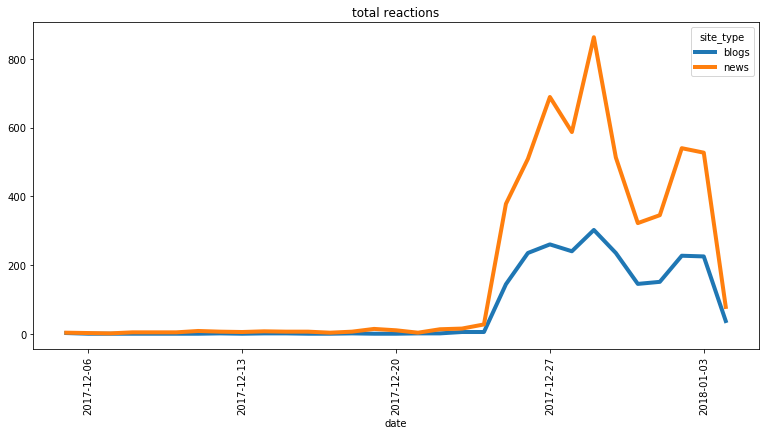

In [5]:
display(op_all_1.pivot_table(columns='site_type',index='date'\
                   ,values='median_sentiment_level',aggfunc='count').fillna(0).\
plot(figsize=(13,6),rot=90,lw=4,title='total reactions'))

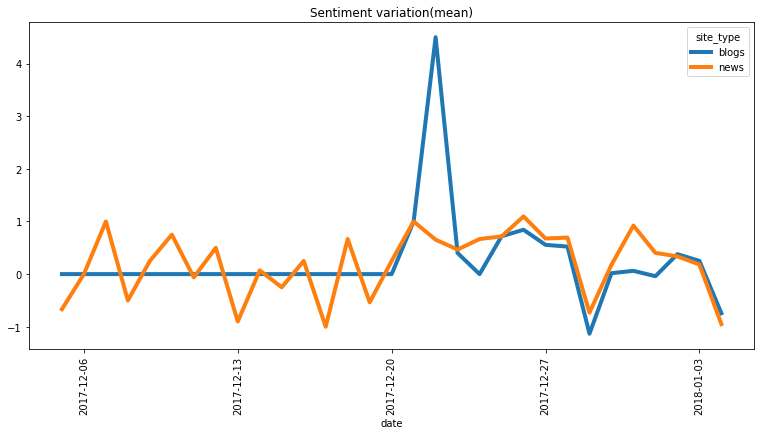

In [13]:
display(op_all_1.pivot_table(columns='site_type',index='date',\
                   values='median_sentiment_level',aggfunc='mean').fillna(0).\
plot(figsize=(13,6),rot=90,lw=4,title='Sentiment variation(mean)'))

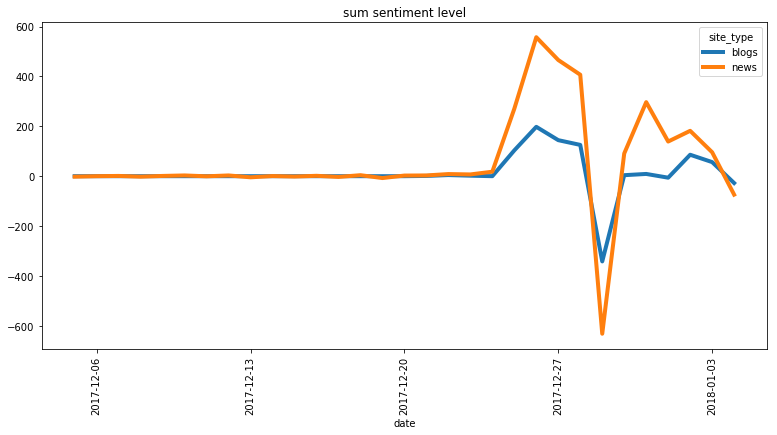

In [12]:
display(op_all_1.pivot_table(columns='site_type',index='date',\
                   values='median_sentiment_level',aggfunc='sum').fillna(0).\
plot(figsize=(13,6),rot=90,lw=4,title='Sentiment variation(sum)'))

In [14]:
display(op_all_1.groupby('site_type').agg({'median_sentiment_level':'describe'}))

median_sentiment_level                                           \
                           count      mean       std   min  25%  50%  75%   
site_type                                                                   
blogs                     2219.0  0.161785  2.972364 -45.0  0.0  0.0  1.0   
news                      5498.0  0.333212  6.583963 -44.0  0.0  0.0  1.0   

                  
             max  
site_type         
blogs       30.5  
news       133.0

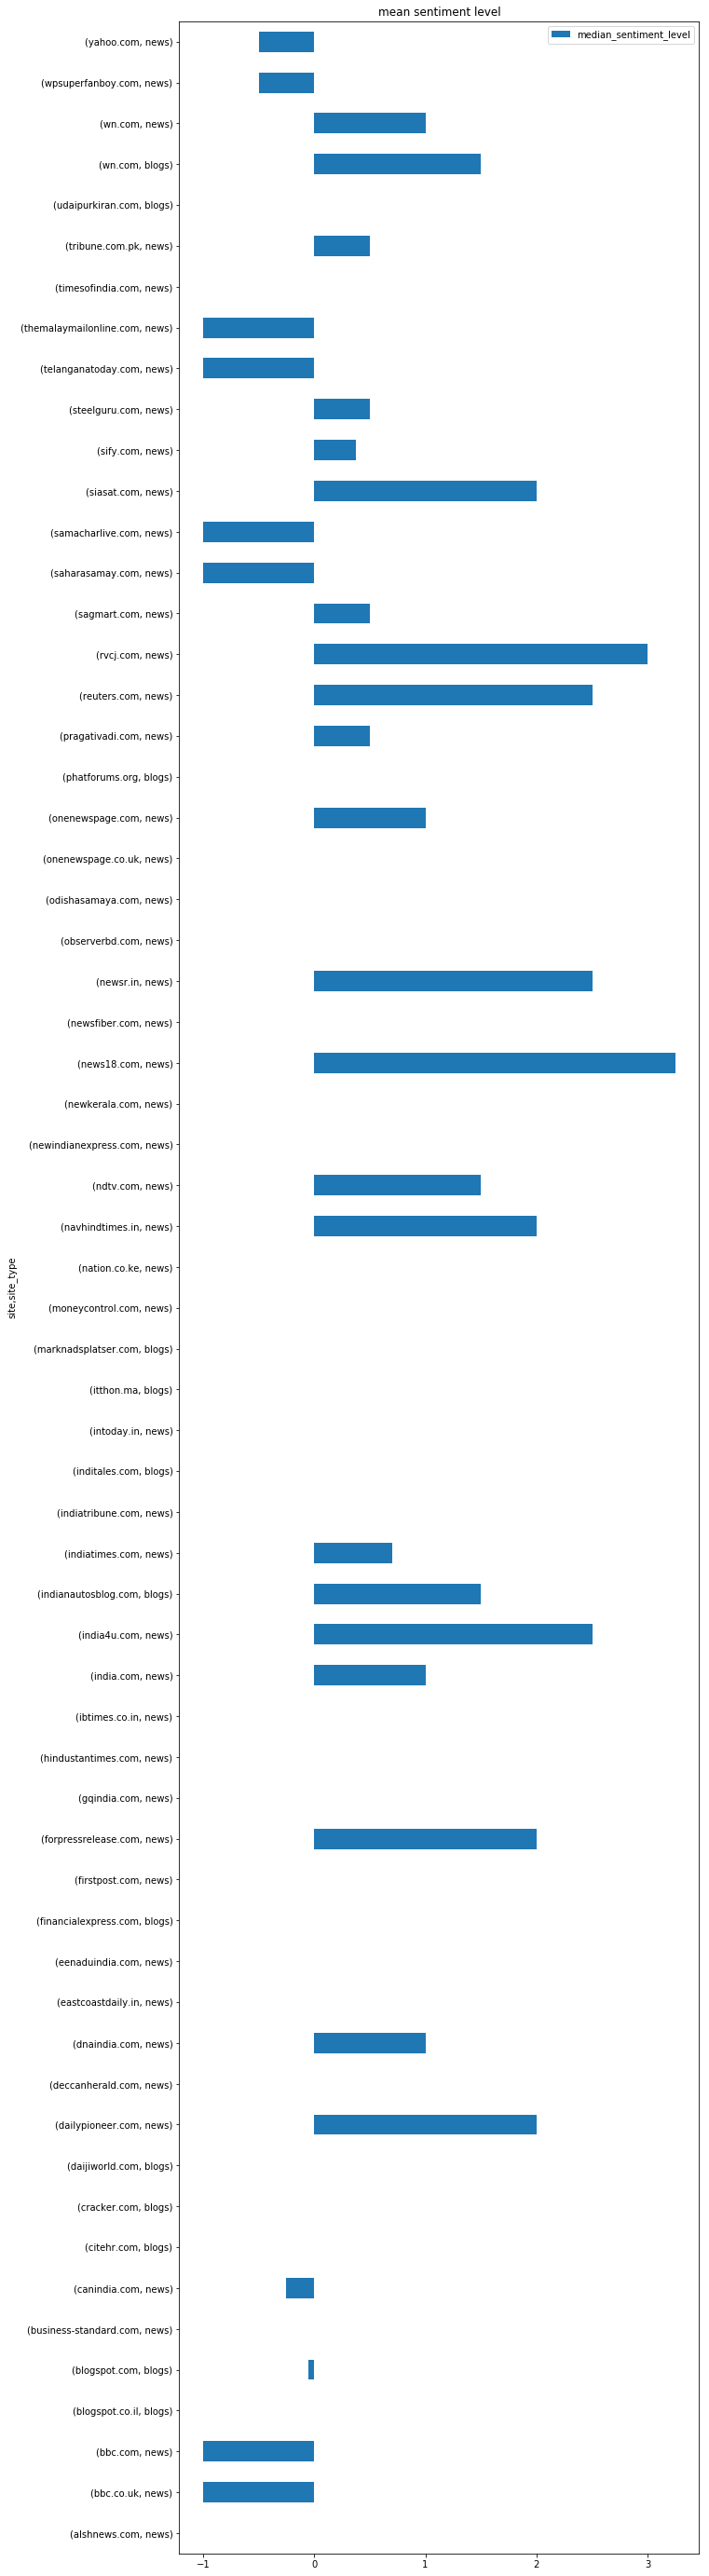

In [15]:
display(op_all_1.head(100).groupby(['site','site_type']).agg({'median_sentiment_level':'mean'})\
        .plot(kind='barh',figsize=(10,min(50,int(.5*op_all.shape[0]))),lw=4,title='mean sentiment level'))

### summary from blog output

In [27]:
# summary from 1 percent data
text_1=op_all[op_all['spam_score']<.4].sample(frac=.01).groupby('site_type').agg({'text':summary_1})
print(summary_1([text_1.loc['news']['text']],summarizer='TextRankSummarizer',SENTENCES_COUNT=2))

Mumbai No parking at Gateway & Marine Drive on New Year's eve Gateway of India People stand in que for baggage checking at the entrance of Gateway of India (Inset) A file photo of revellers a Gateway of India during a previous New Year’s eve - Hemant Padalkar, DNA Share Thursday 28 December 2017 1:20 IST Must read Mumbai Metro authorities don't see the need to increase coaches despite commuter rise In order to ensure a peaceful and less congested New Year, the Mumbai Police has made special security & traffic arrangements at the iconic Gateway of India and Marine Drive. Ltd. Mumbai Area, India General Manager and In charge of the Local Head Office, PUNJAB & SIND BANK Chandigarh Area, India Head of Sales, P&C, Application & Analytics, India, Nokia Gurgaon, India Supplier Relationship Manager, Shotang India Hyderabad Area, India National Retail Manager, Asics India New Delhi Area, India Program Manager, FBA Supply Chain, Amazon Bengaluru Area, India December 27, 2017 21:16 IST Updated: D

## twitter  analysis

### twitter stream analysis

bounding box for India [97.39535869999999, 35.5087008, 68.1097, 6.4626999]
406
406


,0
number of negative revies,3
number of neutral reviews,6
number of positive reviews,10
most negative sentiment,6 Totally counterproductive and idiotic pol...
most positive sentiment,10 @docpensive @narendramodi @AmitShah So i...


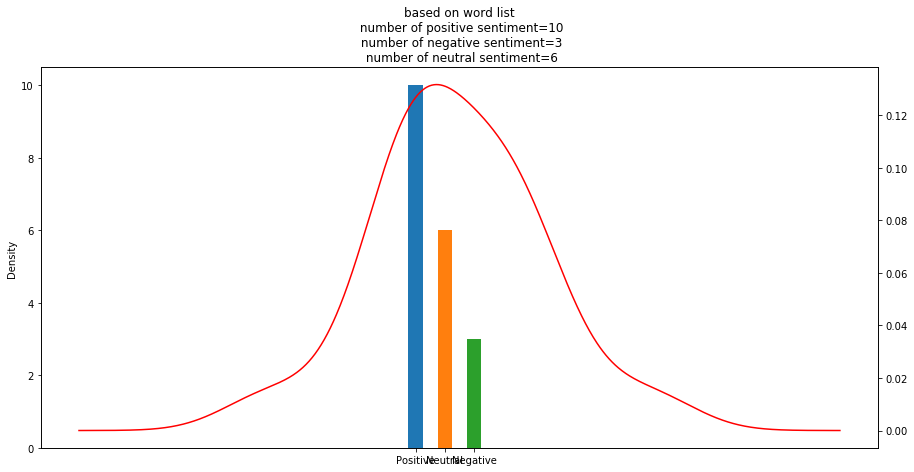

In [2]:
tweets_df=get_tweets()
plot_twitter_stats(tweets_df)

### twitter last week data

,0
number of negative revies,2249
number of neutral reviews,2084
number of positive reviews,4651
most negative sentiment,3049 VERY SAD TO SEE WICKED CONGRESS AND PR...
most positive sentiment,3958 @narendramodi Modi Jai my Indian pm to...


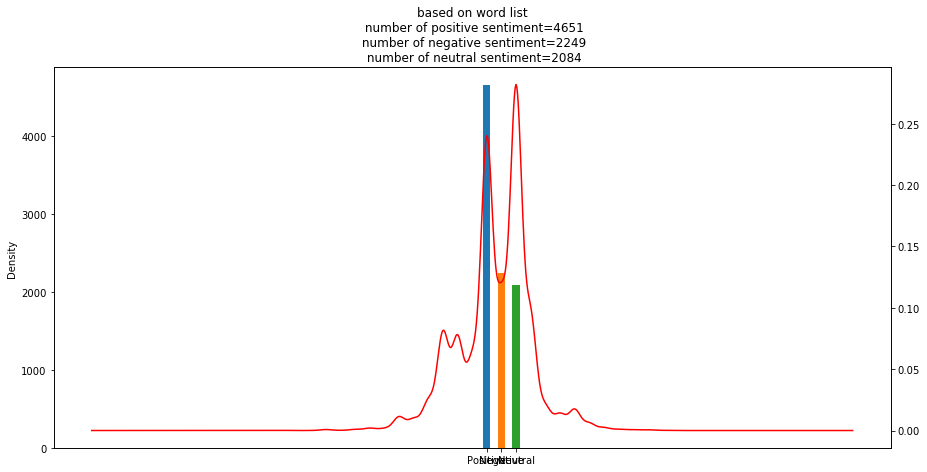

In [3]:
tweets_df=get_last_week_tweets()
plot_twitter_stats(tweets_df)